In [1]:
from typing import Union
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from pathlib import Path

- 모델 학습에 필요한 `random_seed` 를 설정하고, `DATA_PATH` 를 설정합니다.
- 해당 `DATA_PATH` 에는 `train.csv`, `test.csv` 파일이 있다고 가정합니다.

In [2]:
RANDOM_SEED = 42
DATA_PATH = Path("../../data")

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


### 2. Load Train Data


In [3]:
train_data = pd.read_csv(DATA_PATH / "train.csv")
test_data = pd.read_csv(DATA_PATH / "test.csv")

In [4]:
X_train = train_data.iloc[:, 3:]
y_train = train_data.iloc[:, 0]
X_test = test_data.iloc[:, 2:]
X_test = X_test[['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
       'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
       'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
       'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
       'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
       'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
       'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
       'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9',
       'xmv_10', 'xmv_11']] # columns 순서가 같아야 scale이 가능함

In [5]:
X_train.columns

Index(['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
       'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
       'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
       'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
       'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
       'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
       'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
       'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9',
       'xmv_10', 'xmv_11'],
      dtype='object')

In [6]:
X_test.columns

Index(['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
       'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
       'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
       'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
       'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
       'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
       'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
       'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9',
       'xmv_10', 'xmv_11'],
      dtype='object')

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader

class TrainCustomDataset(Dataset):
    def __init__(self, data, window_size=10, device='cpu', transform=None):
        self.data = data
        self.device = device
        self.window_size = window_size
        self.transform = transform
    
    def __len__(self):
        return len(self.data) - self.window_size + 1
    
    def __getitem__(self, idx):
        dataX = self.data[idx:idx+self.window_size]
        
        if self.transform:
            dataX = self.transform(dataX)
        
        return torch.tensor(data=dataX, dtype=torch.float32).to(self.device)

class TestCustomDataset(Dataset):
    def __init__(self, data, window_size=10, device='cpu', transform=None):
        self.data = data
        self.device = device
        self.window_size = window_size
        self.transform = transform
    
    def __len__(self):
        return len(self.data) - self.window_size + 1
    
    def __getitem__(self, idx):
        dataX = self.data[idx:idx+self.window_size]
        
        if self.transform:
            dataX = self.transform(dataX)
        
        return torch.tensor(data=dataX, dtype=torch.float32).to(self.device)

In [8]:
# def standazation(data):
#     mean = np.mean(data, axis=0)
#     std = np.std(data, axis=0)
    
#     return (data - mean) / std

# """
# RuntimeWarning: invalid value encountered in divide

# Warning이 발생해 train loss가 nan으로 나옴 -> standazation을 sklearn으로 해보자.
# """

In [9]:
device = torch.device('cpu')
epochs = 50

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train = np.array(X_train)
train = scaler.fit_transform(train)
train_tensor = torch.tensor(train, dtype=torch.float32, device=device)

test = np.array(X_test)
test = scaler.transform(test)
test_tensor = torch.tensor(test, dtype=torch.float32, device=device)

train_custom_dataset = TrainCustomDataset(train, device=device)
test_custom_dataset = TestCustomDataset(test, device=device)

# train_custom_dataset = TrainCustomDataset(train, transform=standazation)
# test_custom_dataset = TestCustomDataset(test, transform=standazation)

In [11]:
train_batch_size = 500
test_batch_size = 960

train_data_loader = DataLoader(train_custom_dataset, batch_size=train_batch_size, shuffle=False)
test_data_loader = DataLoader(test_custom_dataset, batch_size=test_batch_size, shuffle=False)

In [46]:
for i in train_data_loader:
    print(i.shape)

torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([500, 10, 52])
torch.Size([

In [48]:
for i in test_data_loader:
    print(i.shape)

torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([960, 10, 52])
torch.Size([

In [14]:
# # 필요한 라이브러리 임포트 
# from sklearn.preprocessing import MinMaxScaler 
# from torch.utils.data import DataLoader, TensorDataset 
# import torch  

# # 데이터 스케일러 인스턴스 생성(데이터 표준화)
# scaler = MinMaxScaler() 
# # 학습 데이터셋에 대해 fit과 transform 수행: train 기준 정보 계산 및 데이터 변환
# X_train_scaled = scaler.fit_transform(X_train) 
# # 테스트 데이터셋에 대해서는 transform만 수행: 학습 데이터셋의 기준 정보를 사용하여 데이터 변환
# X_test_scaled = scaler.transform(X_test)

# # PyTorch Tensor로 변환 
# X_train_tensor = torch.FloatTensor(X_train_scaled)
# y_train_tensor = torch.FloatTensor(y_train)
# X_test_tensor = torch.FloatTensor(X_test_scaled)  

# # DataLoader 설정 
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor) # 입력과 타겟이 같음 
# train_loader = DataLoader(train_dataset, batch_size=500, shuffle=False)

In [15]:
from tqdm.auto import tqdm
import torch.nn as nn

class Autoencoder(nn.Module):
    
    def __init__(self):
        super(Autoencoder, self).__init__()
        # 인코더 구성
        self.encoder = nn.Sequential(
        nn.Linear(52, 32), # 입력 차원 52에서 낮은 차수의 중간 차원 32로 압축
        nn.ReLU(), # 활성화 함수 ReLU 사용
        nn.Linear(32, 16), # 중간 차원 32에서 특징 차원 16으로 더 압축
        nn.ReLU(), # 활성화 함수 ReLU 사용
        )
        
        # 디코더 구성
        self.decoder = nn.Sequential(
        nn.Linear(16, 32), # 특징 차원 16에서 중간 차원 32으로 확장
        nn.ReLU(), # 활성화 함수 ReLU 사용
        nn.Linear(32, 52), # 중간 차원 32에서 원본 차원인 52로 복원
        nn.Sigmoid() # 출력을 0과 1 사이로 조정
        )

    def forward(self, x):
        x = self.encoder(x) # 인코딩
        x = self.decoder(x) # 디코딩
        return x

model = Autoencoder().to(device=device)
criterion = nn.MSELoss() # MSE: Mean Squared Error 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) # Adam optimizer

mean_losses = []
loss_list = []
input_list = []
output_list = []

for epoch in tqdm(range(epochs)):
    losses = []
    for data in train_data_loader:
        inputs = data[0]
        input_list.append(inputs)
        optimizer.zero_grad()
        outputs = model(inputs)
        output_list.append(outputs)
        loss = criterion(outputs, inputs)
        losses.append(float(loss.cpu().detach().numpy()))
        loss.backward()
        optimizer.step()
        # print(f'Epoch {epoch+1}, Loss: {loss.item()}')
    loss_list.append(losses)
    mean_losses.append(np.mean(losses))

  0%|          | 0/50 [00:00<?, ?it/s]

<Axes: title={'center': 'AutoEncoder Train Mean Loss'}>

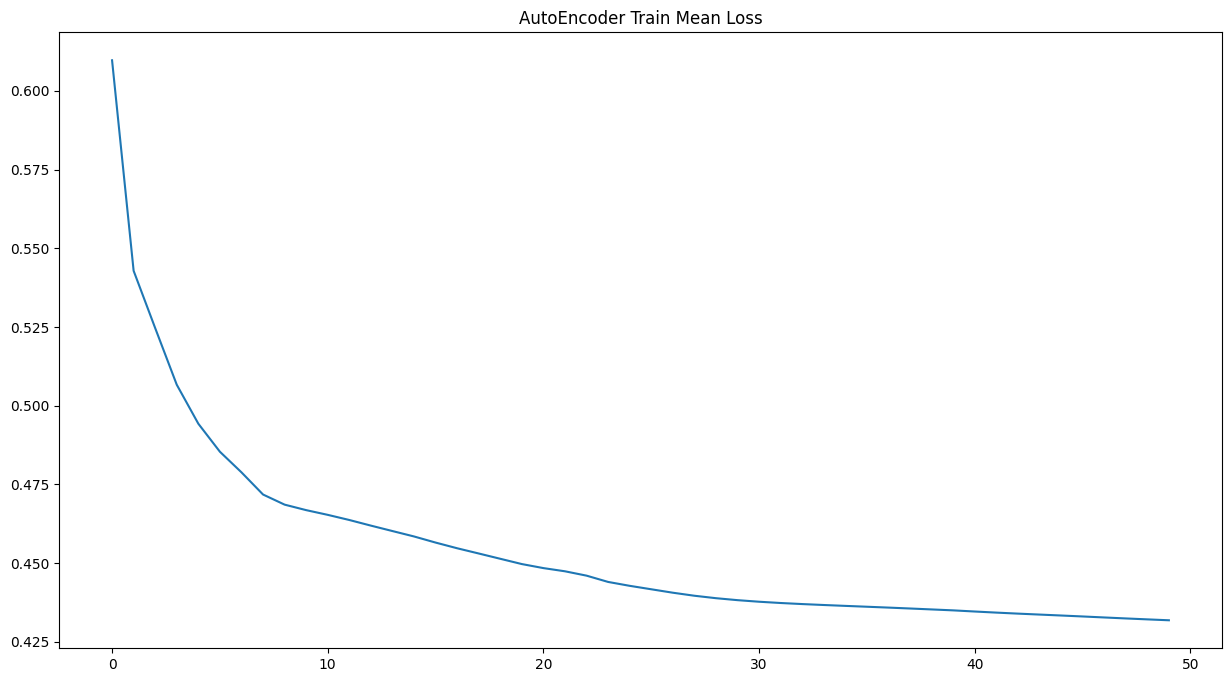

In [16]:
import seaborn as sns

plt.figure(figsize=(15, 8))
plt.title("AutoEncoder Train Mean Loss")
sns.lineplot(mean_losses)

In [17]:
# import matplotlib.pyplot as plt

# # reconstruction error 계산 
# reconstruction_errors = torch.mean((outputs - inputs) ** 2, axis=1)  #MSE

# # reconstruction error 히스토그램 시각화 
# plt.hist(reconstruction_errors.detach().numpy(), bins=20) 
# plt.xlabel('reconstruction error') 
# plt.ylabel('Frequency') 
# plt.title('reconstruction error Distribution')

  0%|          | 0/25000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'mean reconstruction error Distribution')

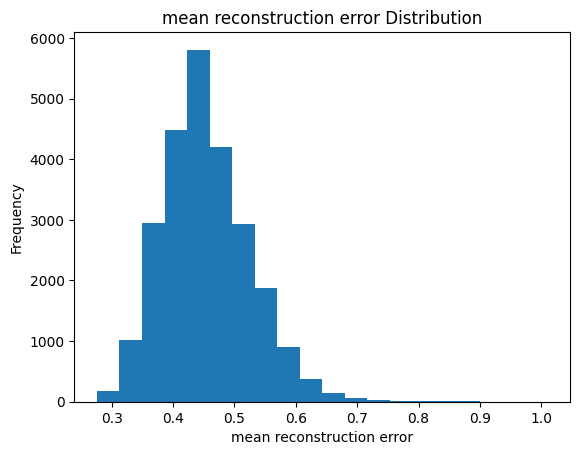

In [18]:
import matplotlib.pyplot as plt  

reconstruction_errors = []
mean_reconstruction_errors = []
for i in tqdm(range(len(input_list))):
    reconstruction_errors.append(torch.mean((output_list[i] - input_list[i]) ** 2, axis=1).detach().numpy())
    mean_reconstruction_errors.append(np.mean(reconstruction_errors[i]))

# reconstruction error 히스토그램 시각화 
plt.hist(mean_reconstruction_errors, bins=20)
plt.xlabel('mean reconstruction error') 
plt.ylabel('Frequency') 
plt.title('mean reconstruction error Distribution')

In [19]:
outputs

tensor([[2.2272e-07, 2.7278e-01, 9.0855e-01, 9.1333e-01, 2.5899e-09, 8.4758e-05,
         6.7705e-03, 9.9868e-01, 3.7106e-02, 3.5913e-05, 2.8303e-02, 3.4412e-04,
         8.9255e-03, 4.9321e-11, 2.4229e-03, 6.2384e-03, 3.7382e-05, 1.0855e-24,
         5.8058e-23, 3.5144e-08, 2.9119e-24, 3.7949e-03, 2.8496e-02, 7.6877e-13,
         2.8647e-07, 3.5168e-04, 1.8603e-12, 3.6253e-05, 1.6997e-11, 3.6207e-03,
         3.4669e-11, 7.7423e-03, 1.8690e-03, 7.9870e-05, 4.5879e-12, 6.9550e-23,
         3.3904e-03, 1.5847e-06, 2.2183e-03, 3.2990e-04, 9.0635e-07, 7.6948e-04,
         6.6104e-06, 3.8923e-07, 8.0449e-07, 4.1474e-04, 4.6611e-05, 3.1984e-04,
         2.4110e-03, 6.5380e-25, 1.0241e-02, 9.6407e-01],
        [1.4118e-02, 1.6979e-02, 1.6861e-03, 2.4232e-04, 9.9858e-01, 3.2652e-01,
         4.3955e-02, 8.2691e-04, 3.1136e-03, 9.6303e-03, 8.3363e-02, 1.7504e-02,
         4.3821e-02, 3.3858e-06, 1.2779e-05, 6.5688e-02, 9.9822e-01, 2.5743e-17,
         2.3134e-15, 6.6574e-05, 4.3883e-17, 2.3914

<Axes: >

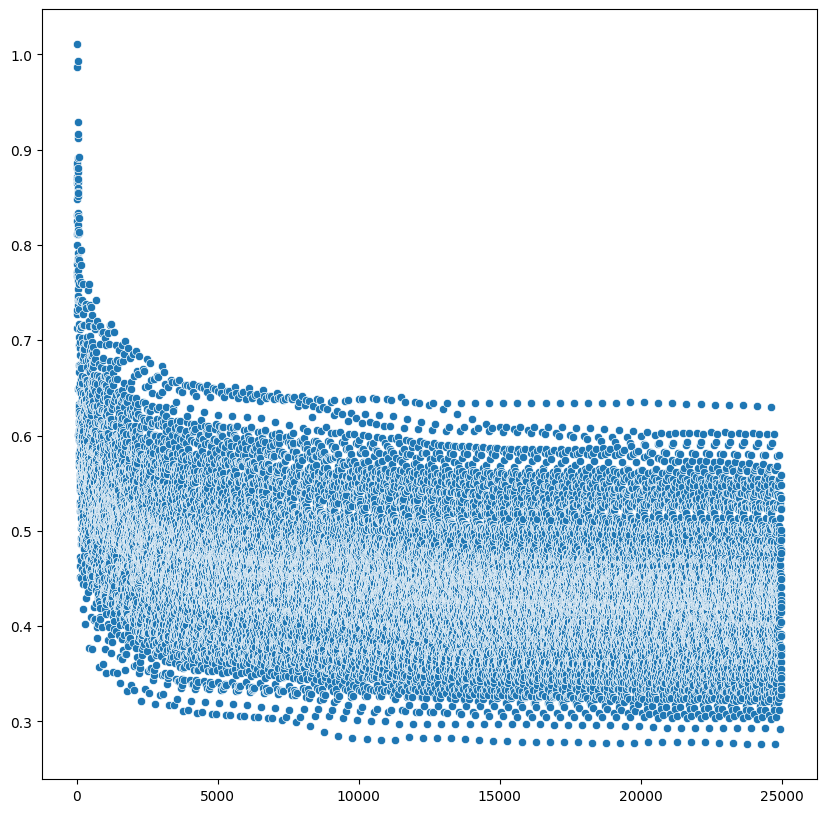

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x=range(0, len(mean_reconstruction_errors)), y=mean_reconstruction_errors)

In [21]:
def predict(model, dataset):
    with torch.no_grad():
        model.eval()
        outputs = model(dataset)
    
    reconstruction_errors = torch.mean((outputs - dataset)**2, axis=1)
    return reconstruction_errors

In [22]:
test_tensor

tensor([[-3.9261e-02, -1.0082e+00,  2.3155e-01,  ..., -1.9569e-01,
         -1.4521e+00, -1.4400e+00],
        [ 6.4712e-02,  1.2099e-01,  1.2700e-01,  ..., -3.3116e-01,
          3.3597e-01,  1.5381e+00],
        [ 2.1957e-02, -8.5530e-01, -7.1961e-01,  ..., -1.3495e-01,
          1.9544e-01, -1.4229e+00],
        ...,
        [-8.1132e+00, -1.2758e+00, -4.4452e+00,  ...,  1.9308e+01,
         -7.6051e+01,  3.2131e-01],
        [-8.1132e+00, -1.2758e+00, -4.4452e+00,  ...,  1.9308e+01,
         -7.6051e+01,  3.1789e-01],
        [-8.1132e+00, -1.2758e+00, -4.4452e+00,  ...,  1.9308e+01,
         -7.6051e+01,  3.1448e-01]])

In [23]:
test_reconstruction_errors = predict(model=model, dataset=test_tensor)

In [24]:
train_reconstruction_errors = predict(model=model, dataset=train_tensor)

In [25]:
train_reconstruction_errors

tensor([0.0784, 0.1777, 0.3149,  ..., 0.5794, 0.8734, 0.8990])

In [26]:
test_reconstruction_errors

tensor([1.6581e-01, 2.0804e-01, 4.9904e-01,  ..., 8.3112e+02, 8.3280e+02,
        8.3280e+02])

In [27]:
min(train_reconstruction_errors)

tensor(0.0350)

In [28]:
max(train_reconstruction_errors)

tensor(3.9645)

<Axes: >

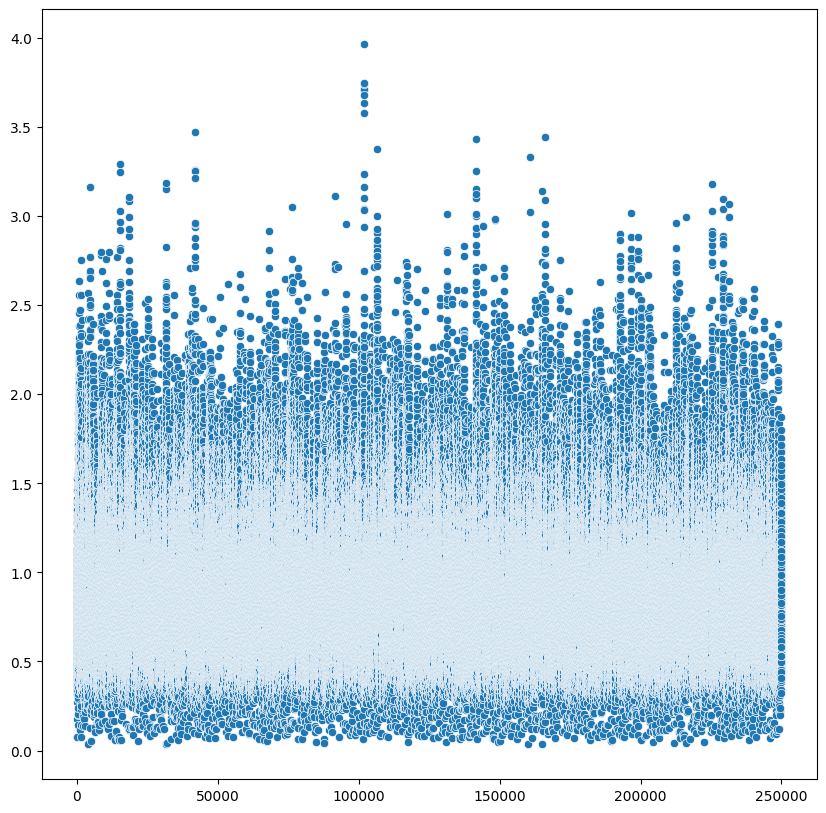

In [29]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=range(0, len(train_reconstruction_errors)), y=train_reconstruction_errors.detach().numpy())

<Axes: >

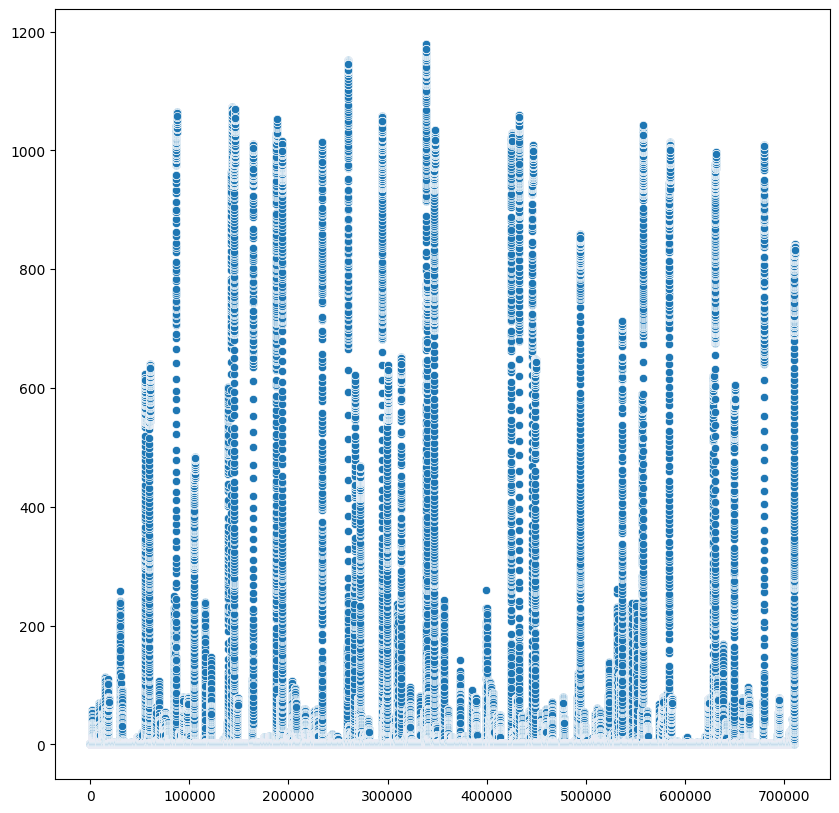

In [30]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=range(0, len(test_reconstruction_errors)), y=test_reconstruction_errors.detach().numpy())

In [31]:
len(np.where((min(train_reconstruction_errors.numpy()) > test_reconstruction_errors.numpy()) | (max(train_reconstruction_errors.numpy()) < test_reconstruction_errors.numpy()))[0])

101538

In [32]:
faultnum = np.where((min(train_reconstruction_errors.numpy()) > test_reconstruction_errors.numpy()) | (max(train_reconstruction_errors.numpy()) < test_reconstruction_errors.numpy()), 1, 0)

In [33]:
submission = pd.DataFrame(data = faultnum, columns=["faultNumber"])

In [34]:
submission

,faultNumber
0,0
1,0
2,0
3,0
4,0
...,...
710395,1
710396,1
710397,1
710398,1


In [35]:
pd.concat([test_data, submission], axis=1)

,sample,simulationRun,xmeas_1,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,...,xmv_11,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,faultNumber
0,1,151,0.24927,0.33775,80.122,50.119,2632.7,25.883,50.561,3101.9,...,16.011,53.877,24.767,62.495,22.050,39.9870,38.451,47.832,47.427,0
1,2,151,0.25248,0.33964,80.075,49.453,2632.4,25.949,51.504,3101.8,...,20.370,53.926,24.452,58.961,21.920,39.7560,36.490,50.014,47.059,0
2,3,151,0.25116,0.33801,80.147,48.533,2633.3,25.131,51.688,3102.2,...,16.036,54.323,24.588,60.385,22.270,39.9540,33.784,50.440,47.592,0
3,4,151,0.24815,0.33556,80.163,48.250,2632.3,23.923,49.509,3102.8,...,15.611,54.171,24.885,63.593,22.068,40.2530,32.951,45.397,47.591,0
4,5,151,0.23961,0.32149,80.138,48.410,2632.6,23.388,49.588,3102.2,...,16.618,53.690,23.879,61.476,21.861,38.2170,33.422,45.579,47.524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710395,956,438,0.00000,0.20767,72.732,50.324,2920.8,25.377,49.508,3443.4,...,18.598,41.967,100.000,100.000,100.020,1.7372,39.055,45.394,100.410,1
710396,957,438,0.00000,0.20767,72.732,50.324,2920.8,25.377,49.508,3443.4,...,18.594,43.628,100.000,100.000,100.020,0.0000,39.055,45.394,100.410,1
710397,958,438,0.00000,0.20767,72.732,50.324,2920.8,25.377,49.508,3443.4,...,18.589,43.628,100.000,100.000,100.020,0.0000,39.055,45.394,100.410,1
710398,959,438,0.00000,0.20767,72.732,50.324,2920.8,25.377,49.508,3443.4,...,18.584,41.859,100.000,100.000,100.020,1.7723,39.055,45.394,100.410,1


In [36]:
desc_pred = pd.concat([test_data, submission], axis=1)[["simulationRun", "sample", "faultNumber"]]

In [37]:
desc_pred

,simulationRun,sample,faultNumber
0,151,1,0
1,151,2,0
2,151,3,0
3,151,4,0
4,151,5,0
...,...,...,...
710395,438,956,1
710396,438,957,1
710397,438,958,1
710398,438,959,1


In [38]:
desc_pred.query("faultNumber==1").groupby("simulationRun").count()

,sample,faultNumber
simulationRun,,
5,794,794
7,778,778
10,425,425
22,539,539
24,714,714
...,...,...
729,745,745
733,4,4
734,408,408


In [39]:
import plotly.graph_objects as go

fig = go.Figure()
plot_data = desc_pred.query("faultNumber==1").groupby("simulationRun").count()

fig.add_trace(go.Scatter(x=plot_data.index, y=plot_data["faultNumber"], mode='markers'))

fig.update_layout(width = 1400, height = 800, xaxis_title='simulationRun', yaxis_title='Number of anomaly')

In [63]:
submission.to_csv("submission_autoencoder_window-10.csv")